In [ ]:
#import the dataset
import zipfile
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d mmhossain/pregnancy-risk-factor-data
zf=zipfile.ZipFile("/content/pregnancy-risk-factor-data.zip",'r')
zf.extractall("/content")
zf.close()

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mmhossain/pregnancy-risk-factor-data
License(s): unknown
  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 50.4MB/s]


In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load dataset
data = pd.read_csv('/content/pregnancy risk prediction data set.csv', encoding='latin1') # or 'ISO-8859-1'

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])
print(missing_values)

Series([], dtype: int64)
Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64


In [ ]:
# check for duplicate values
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# print the dataframe
data.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [ ]:
# printing the shape of data
data.shape

(6103, 11)

In [ ]:
# printing the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

In [ ]:
# overview of the data
data.describe()

,Patient ID,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,6.103000e+03,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,2.003343e+06,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752
std,6.604395e+03,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327
min,1.993365e+06,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000
25%,1.994890e+06,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000
50%,2.003000e+06,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000
75%,2.010128e+06,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000
max,2.013179e+06,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000


In [ ]:
# change the outcome column String to integer type
data['Outcome'] = data['Outcome'].replace({'low risk': 0, 'mid risk': 1, 'high risk': 2})

<ipython-input-10-6843b6ea97eb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Outcome'] = data['Outcome'].replace({'low risk': 0, 'mid risk': 1, 'high risk': 2})


In [ ]:
# drop the Paitient ID and Name Column
data.drop(['Patient ID', 'Name'],axis=1,inplace=True)

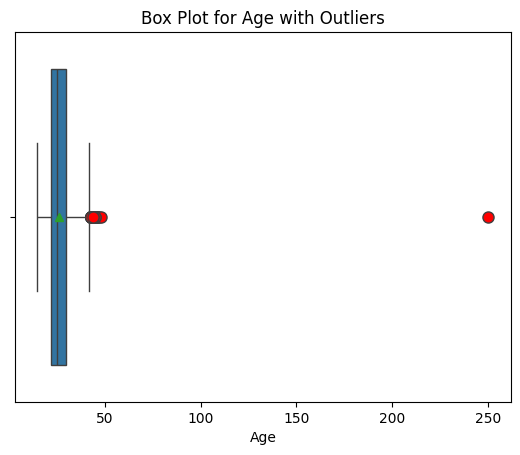

In [ ]:
# Box Plot of Age
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot for 'Age' with outlier markers
sns.boxplot(x=data['Age'], showmeans=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title('Box Plot for Age with Outliers')
plt.xlabel('Age')
plt.show()

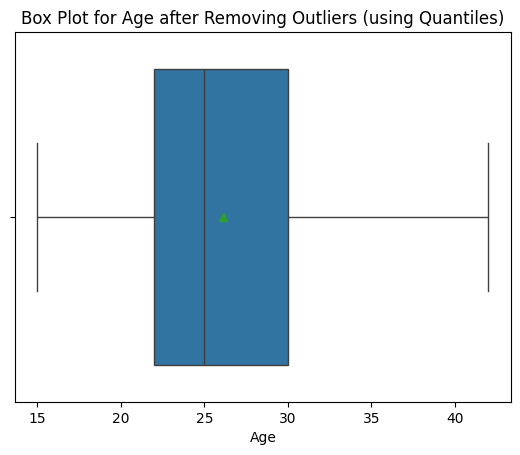

In [ ]:
# Removing the outlier and print the boxplot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate quantiles
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_age_data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Create the box plot for 'Age' after removing outliers
sns.boxplot(x=filtered_age_data['Age'], showmeans=True)  # Show means for better visualization
plt.title('Box Plot for Age after Removing Outliers (using Quantiles)')
plt.xlabel('Age')
plt.show()

In [ ]:
# print the data shape after 'Age' Outlier removal
print("after age outlier remove : ")
filtered_age_data.shape

after age outlier remove : 


(6017, 9)

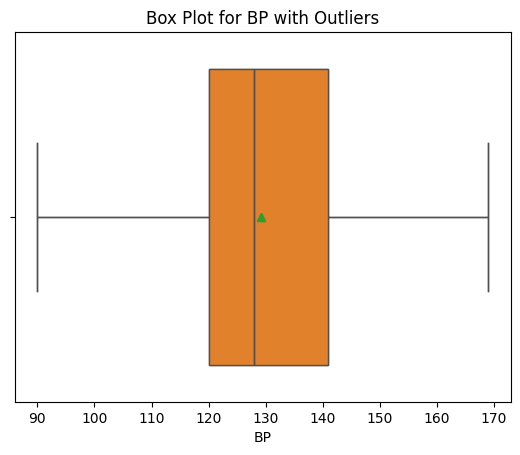

In [ ]:
# Create the box plot for 'BP' with outlier markers
sns.boxplot(x=data['Systolic Blood Pressure(mm Hg)'], showmeans=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title('Box Plot for BP with Outliers')
plt.xlabel('BP')
# Create the box plot for 'BP' with outlier markers
sns.boxplot(x=data['Systolic Blood Pressure(mm Hg)'], showmeans=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title('Box Plot for BP with Outliers')
plt.xlabel('BP')
plt.show()


In [ ]:
# No need to change the shape , because no Outlier present
filtered_age_data.shape

(6017, 9)

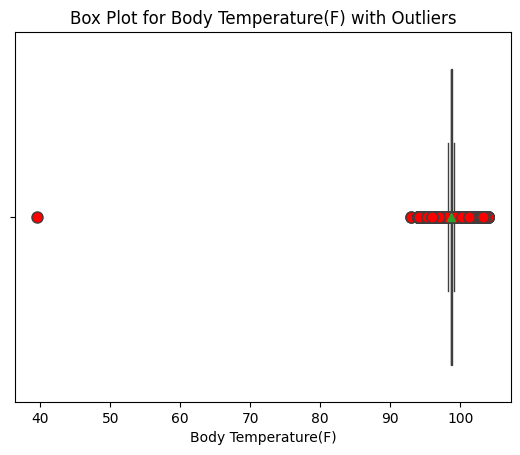

In [ ]:
# Create the box plot for 'Body Temperature(F)' with outlier markers
sns.boxplot(x=filtered_age_data['Body Temperature(F) '], showmeans=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title('Box Plot for Body Temperature(F) with Outliers')
plt.xlabel('Body Temperature(F)')
#plt.show()

Upper Bound (3u): 103.32796939468207
Lower Bound (-3u): 93.96785909127439


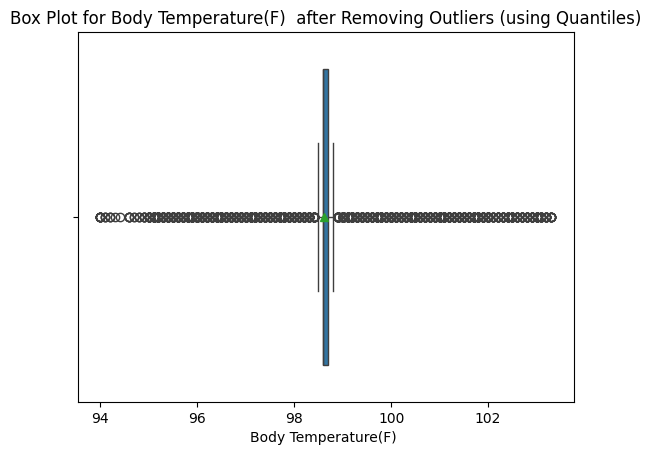

In [ ]:
# removing the Outlier part

column_data = filtered_age_data['Body Temperature(F) ']

# Calculate the mean and standard deviation
mean = np.mean(column_data)
std_dev = np.std(column_data)

# Calculate the upper and lower bounds
upper_bound1 = mean + 3 * std_dev
lower_bound1 = mean - 3 * std_dev

print(f"Upper Bound (3u): {upper_bound1}")
print(f"Lower Bound (-3u): {lower_bound1}")


# Filter data to remove outliers
filtered_temperature_data = filtered_age_data[(filtered_age_data['Body Temperature(F) '] >= lower_bound1) & (filtered_age_data['Body Temperature(F) '] <= upper_bound1)]

# Create the box plot for 'Age' after removing outliers
sns.boxplot(x=filtered_temperature_data['Body Temperature(F) '], showmeans=True)  # Show means for better visualization
plt.title('Box Plot for Body Temperature(F)  after Removing Outliers (using Quantiles)')
plt.xlabel('Body Temperature(F) ')
plt.show()

In [ ]:
# print the data shape after removing 'Body Temperature(F) '
print("after Body Temperature(F)  Outlier remove : ")
filtered_temperature_data.shape

after Body Temperature(F)  Outlier remove : 


(5960, 9)

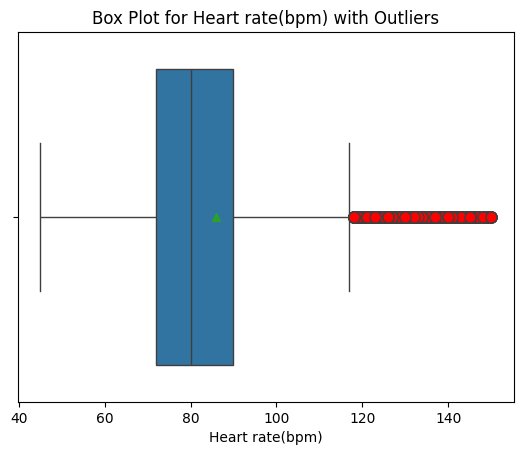

In [ ]:
# Create the box plot for 'Heart rate(bpm)' with outlier markers
sns.boxplot(x=filtered_temperature_data['Heart rate(bpm)'], showmeans=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title('Box Plot for Heart rate(bpm) with Outliers')
plt.xlabel('Heart rate(bpm)')
plt.show()

72.0 90.0 18.0
Upper Bound (3u): 117.0
Lower Bound (-3u): 45.0
72.0 90.0 36.0
Upper Bound (3u): 189.0
Lower Bound (-3u): 45.0


<ipython-input-24-8aa1ae62f327>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_heart2_data = filtered_temperature_data1[(filtered_temperature_data['Heart rate(bpm)'] >= lower_bound2) & (filtered_temperature_data['Heart rate(bpm)'] <= upper_bound2)]


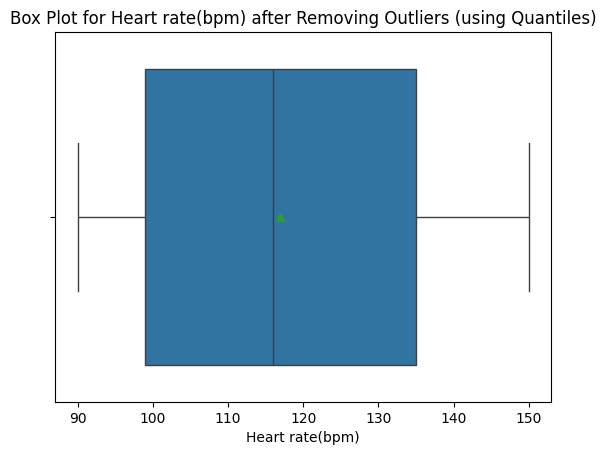

In [ ]:
# removing the 'Heart rate(bpm)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate quantiles
Q1 = filtered_temperature_data['Heart rate(bpm)'].quantile(0.25)
Q3 = filtered_temperature_data['Heart rate(bpm)'].quantile(0.75)
IQR = Q3 - Q1

print(Q1 ,Q3, IQR)
# Define upper and lower bounds for outliers
lower_bound2 = Q1 - 1.5 * IQR
upper_bound2 = Q3 + 1.5 * IQR

print(f"Upper Bound (3u): {upper_bound2}")
print(f"Lower Bound (-3u): {lower_bound2}")

filtered_temperature_data1=filtered_temperature_data[ (filtered_temperature_data['Heart rate(bpm)'] >= Q3)]

# Calculate quantiles
Q11 = filtered_temperature_data1['Heart rate(bpm)'].quantile(0.25)
Q31 = filtered_temperature_data1['Heart rate(bpm)'].quantile(0.75)
IQR = Q31 - Q11

print(Q1 ,Q3, IQR)
# Define upper and lower bounds for outliers
lower_bound2 = Q11 - 1.5 * IQR
upper_bound2 = Q31 + 1.5 * IQR

print(f"Upper Bound (3u): {upper_bound2}")
print(f"Lower Bound (-3u): {lower_bound2}")

# Filter data to remove outliers
filtered_heart2_data = filtered_temperature_data1[(filtered_temperature_data['Heart rate(bpm)'] >= lower_bound2) & (filtered_temperature_data['Heart rate(bpm)'] <= upper_bound2)]

# Create the box plot for 'Age' after removing outliers
sns.boxplot(x=filtered_heart2_data['Heart rate(bpm)'], showmeans=True)  # Show means for better visualization
plt.title('Box Plot for Heart rate(bpm) after Removing Outliers (using Quantiles)')
plt.xlabel('Heart rate(bpm)')
plt.show()

In [ ]:
filtered_heart_data = pd.concat([filtered_temperature_data[ (filtered_temperature_data['Heart rate(bpm)'] < Q3)],filtered_heart2_data],ignore_index=True)

In [ ]:
# data size after removing Heart rate Outlier
print("after Heart rate Outlier remove : ")
filtered_heart_data.shape

after Heart rate Outlier remove : 


(5960, 9)

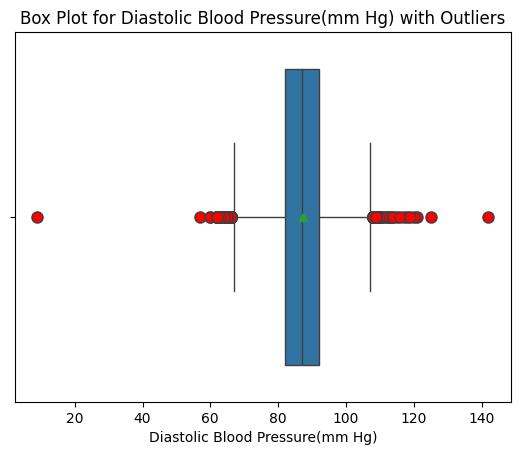

In [ ]:
# Create the box plot for 'Diastolic Blood Pressure(mm Hg)' with outlier markers
sns.boxplot(x=data['Diastolic Blood Pressure(mm Hg)'], showmeans=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title('Box Plot for Diastolic Blood Pressure(mm Hg) with Outliers')
plt.xlabel('Diastolic Blood Pressure(mm Hg)')
plt.show()

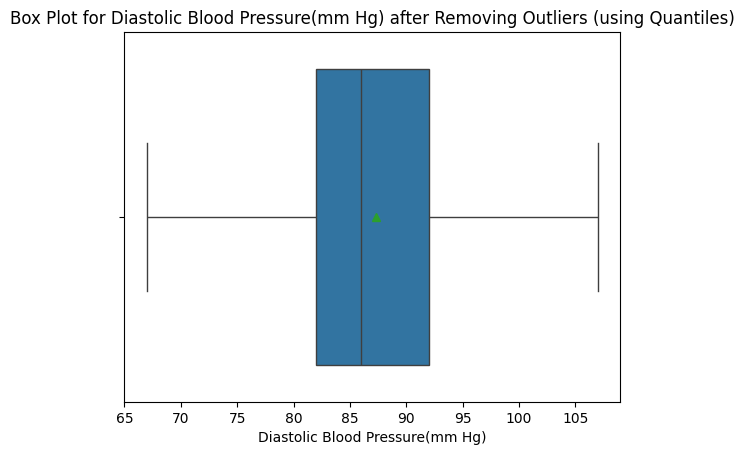

In [ ]:
# removing the Diastolic Blood Pressure(mm Hg) Outlier

# Calculate quantiles
Q1 = filtered_heart_data['Diastolic Blood Pressure(mm Hg)'].quantile(0.25)
Q3 = filtered_heart_data['Diastolic Blood Pressure(mm Hg)'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_blood_data = filtered_heart_data[(filtered_heart_data['Diastolic Blood Pressure(mm Hg)'] >= lower_bound) & (filtered_heart_data['Diastolic Blood Pressure(mm Hg)'] <= upper_bound)]

# Create the box plot for 'Age' after removing outliers
sns.boxplot(x=filtered_blood_data['Diastolic Blood Pressure(mm Hg)'], showmeans=True)  # Show means for better visualization
plt.title('Box Plot for Diastolic Blood Pressure(mm Hg) after Removing Outliers (using Quantiles)')
plt.xlabel('Diastolic Blood Pressure(mm Hg)')
plt.show()

In [ ]:
# data size after removing Diastolic Blood Pressure(mm Hg) Outlier
print("after Diastolic Blood Pressure(mm Hg) Outlier remove : ")
filtered_blood_data.shape

after Diastolic Blood Pressure(mm Hg) Outlier remove : 


(5816, 9)

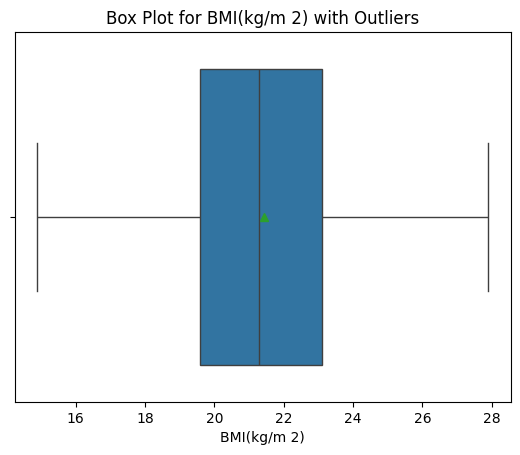

In [ ]:
# Create the box plot for 'BMI(kg/m 2)' with outlier markers
sns.boxplot(x=data['BMI(kg/m 2)'], showmeans=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title('Box Plot for BMI(kg/m 2) with Outliers')
plt.xlabel('BMI(kg/m 2)')
plt.show()

# Assigning the value of filtered_blood_data into filtered_BMI_data
filtered_BMI_data=filtered_blood_data

In [ ]:
# Data size after removing BMI (Kg/m 2)
print("after BMI (Kg/m 2) Outlier remove : ")
filtered_BMI_data.shape

after BMI (Kg/m 2) Outlier remove : 


(5816, 9)

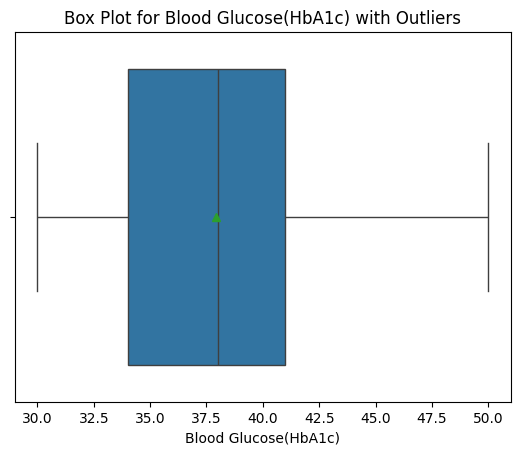

In [ ]:
# Create the box plot for 'Blood Glucose(Fasting hour-mg/dl)' with outlier markers

sns.boxplot(x=data['Blood Glucose(HbA1c)'], showmeans=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title('Box Plot for Blood Glucose(HbA1c) with Outliers')
plt.xlabel('Blood Glucose(HbA1c)')
plt.show()

filtered_glucose_data = filtered_BMI_data

In [ ]:
# Data shape after removing Blood Glucose(HbA1c)
print("after Blood Glucose(HbA1c) Outlier remove : ")
filtered_glucose_data.shape

after Blood Glucose(HbA1c) Outlier remove : 


(5816, 9)

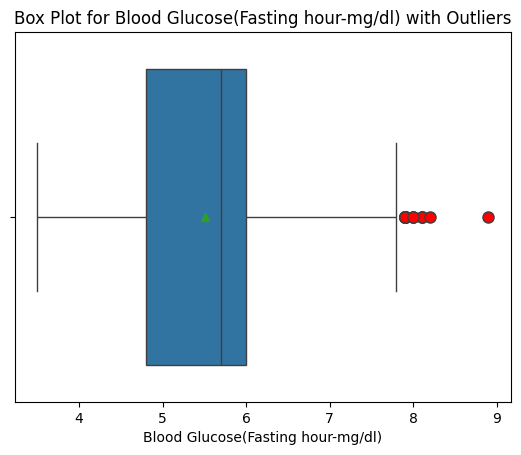

In [ ]:
# Box plot for Blood Glucose(Fasting hour-mg/dl) data

sns.boxplot(x=data['Blood Glucose(Fasting hour-mg/dl)'], showmeans=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title('Box Plot for Blood Glucose(Fasting hour-mg/dl) with Outliers')
plt.xlabel('Blood Glucose(Fasting hour-mg/dl)')
plt.show()

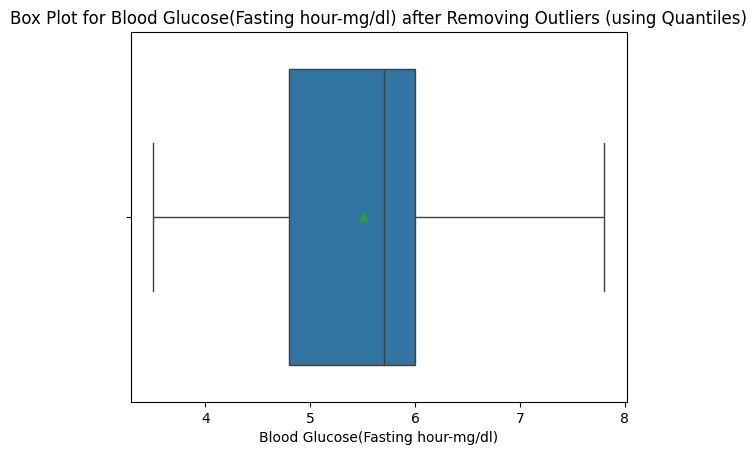

In [ ]:
# removing the Outlier in Blood Glucose(Fasting hour-mg/dl) and show the boxplot

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate quantiles
Q1 = filtered_glucose_data['Blood Glucose(Fasting hour-mg/dl)'].quantile(0.25)
Q3 = filtered_glucose_data['Blood Glucose(Fasting hour-mg/dl)'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_Fasting_data = filtered_glucose_data[(filtered_glucose_data['Blood Glucose(Fasting hour-mg/dl)'] >= lower_bound) & (filtered_glucose_data['Blood Glucose(Fasting hour-mg/dl)'] <= upper_bound)]

# Create the box plot for 'Age' after removing outliers
sns.boxplot(x=filtered_Fasting_data['Blood Glucose(Fasting hour-mg/dl)'], showmeans=True)  # Show means for better visualization
plt.title('Box Plot for Blood Glucose(Fasting hour-mg/dl) after Removing Outliers (using Quantiles)')
plt.xlabel('Blood Glucose(Fasting hour-mg/dl)')
plt.show()

In [ ]:
# Data size after removing the 'Blood Glucose(Fasting hour-mg/dl) Outlier
print("after Blood Glucose(Fasting hour-mg/dl) Outlier remove : ")
filtered_Fasting_data.shape

after Blood Glucose(Fasting hour-mg/dl) Outlier remove : 


(5789, 9)

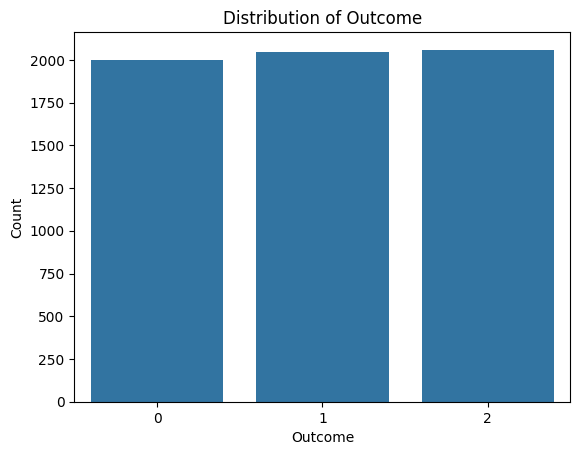

In [ ]:
# Plotting the Outcome distribution

sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [ ]:
# Counting the values Of Outcome
outcome_distribution = data['Outcome'].value_counts()
print(outcome_distribution)

Outcome
2    2059
1    2043
0    2001
Name: count, dtype: int64


In [ ]:
# Intital Data shape
print(f'Initial Data Shape: {data.shape}')

# After removing all Outlier the data shape
print(f'After Outlier Removal: {filtered_Fasting_data.shape}')


Initial Data Shape: (6103, 9)
After Outlier Removal: (5789, 9)


In [ ]:
# after the EDA
updated_data = filtered_Fasting_data

#showcasing the data
updated_data.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,29,98.6,84,129,87,19.0,42,6.4,1
1,38,102.5,51,106,91,18.8,38,4.3,2
2,21,98.6,85,142,89,22.0,30,5.6,1
3,23,98.8,70,141,80,18.8,32,5.6,1
4,22,100.1,62,144,92,24.3,46,6.7,2


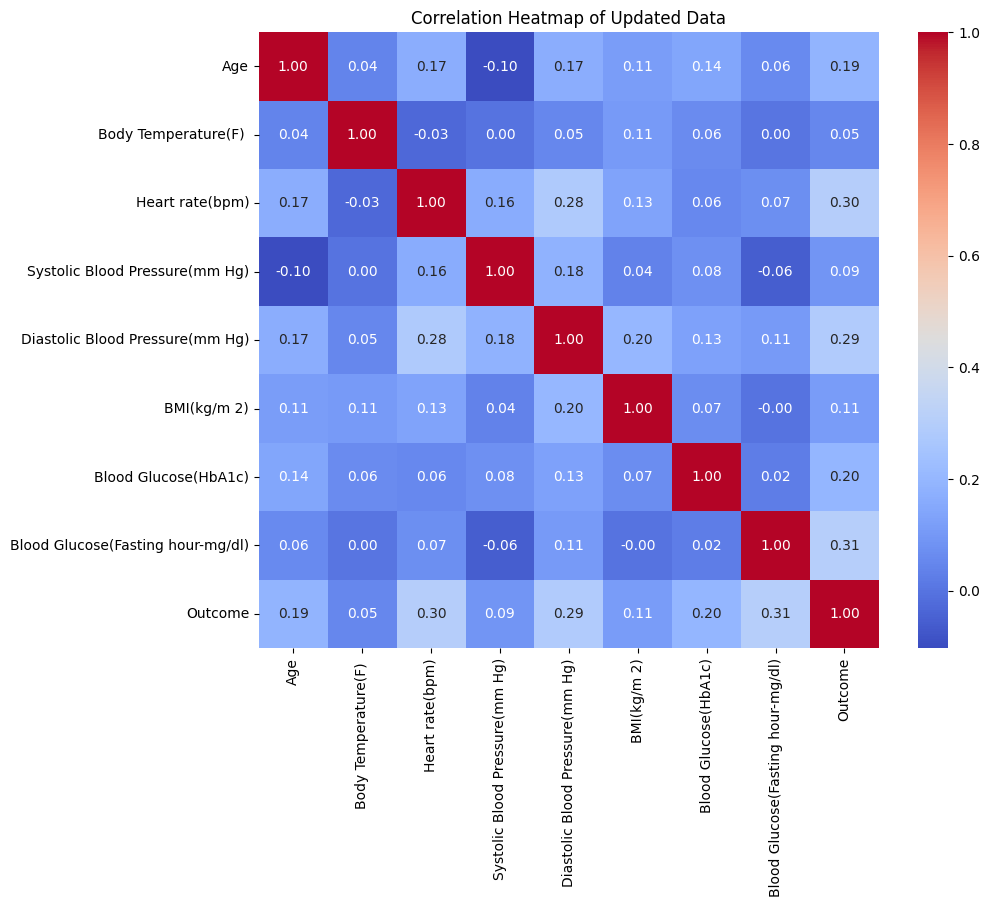

In [ ]:
# Print the correlation heatmap

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for numeric operations


# Calculate the correlation matrix, only including numeric columns
correlation_matrix = updated_data.select_dtypes(include=np.number).corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Updated Data')
plt.show()

In [ ]:
# Split the data in train and test
from sklearn.model_selection import train_test_split
X = data.drop(['Outcome'],axis=1)
y = data['Outcome']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4882, 8), (1221, 8), (4882,), (1221,))

In [ ]:
# Predict using Linear Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.556920556920557
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       397
           1       0.49      0.48      0.49       405
           2       0.56      0.43      0.49       419

    accuracy                           0.56      1221
   macro avg       0.55      0.56      0.55      1221
weighted avg       0.55      0.56      0.55      1221

[[305  66  26]
 [ 97 196 112]
 [102 138 179]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


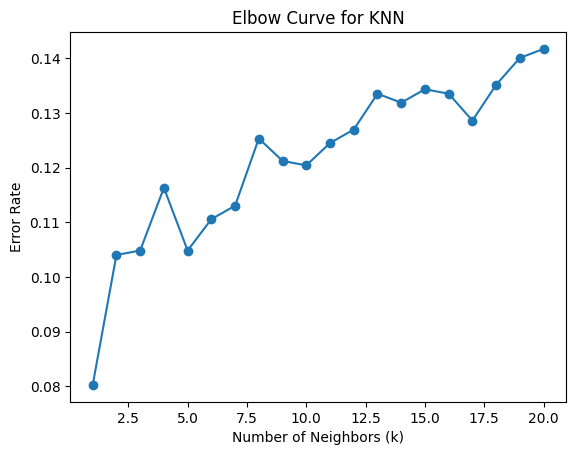

In [ ]:
# Printing the elbow method for suitable K values
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined from your previous code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of k values to test
k_values = range(1, 21)  # You can adjust this range

# List to store error rates for each k
error_rates = []

# Calculate error rates for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))  # Store error rate

# Plot the elbow curve
plt.plot(k_values, error_rates, marker='o')
plt.title('Elbow Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# Implementing KNN Model

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a KNN classifier with k=5 (you can experiment with different values)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8951678951678952
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       397
           1       0.84      0.89      0.86       405
           2       0.93      0.80      0.86       419

    accuracy                           0.90      1221
   macro avg       0.90      0.90      0.89      1221
weighted avg       0.90      0.90      0.89      1221

[[397   0   0]
 [ 17 361  27]
 [ 14  70 335]]


In [ ]:
# Implementing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# 2. Train the model
rf_classifier.fit(X_train, y_train)

# 3. Make predictions
y_pred = rf_classifier.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9918099918099919
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       0.99      0.99      0.99       405
           2       0.99      0.99      0.99       419

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

[[396   0   1]
 [  1 401   3]
 [  0   5 414]]


In [ ]:
# Implementing XG BOOST Classifier

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier # Import XGBClassifier

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your training target labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)

# Create an XGBoost classifier
xgb_classifier = XGBClassifier() # Initialize xgb_classifier

# Train the model using the encoded target labels
xgb_classifier.fit(X_train, y_train_encoded)

# To make predictions, you'll need to encode the test data as well:
y_pred = xgb_classifier.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred) # Convert predictions back to original labels

# Now you can evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary metrics functions if not already imported
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9926289926289926
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       0.99      0.99      0.99       405
           2       0.99      0.99      0.99       419

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

[[396   0   1]
 [  1 401   3]
 [  0   4 415]]


In [ ]:
# Implemtation in SVM

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined from your previous code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model with a polynomial kernel
svm_classifier = SVC(kernel='poly', degree=3)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8083538083538083


In [ ]:
# Checking for Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9852579852579852
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       0.98      0.98      0.98       405
           2       0.98      0.99      0.99       419

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

[[393   3   1]
 [  3 396   6]
 [  0   5 414]]


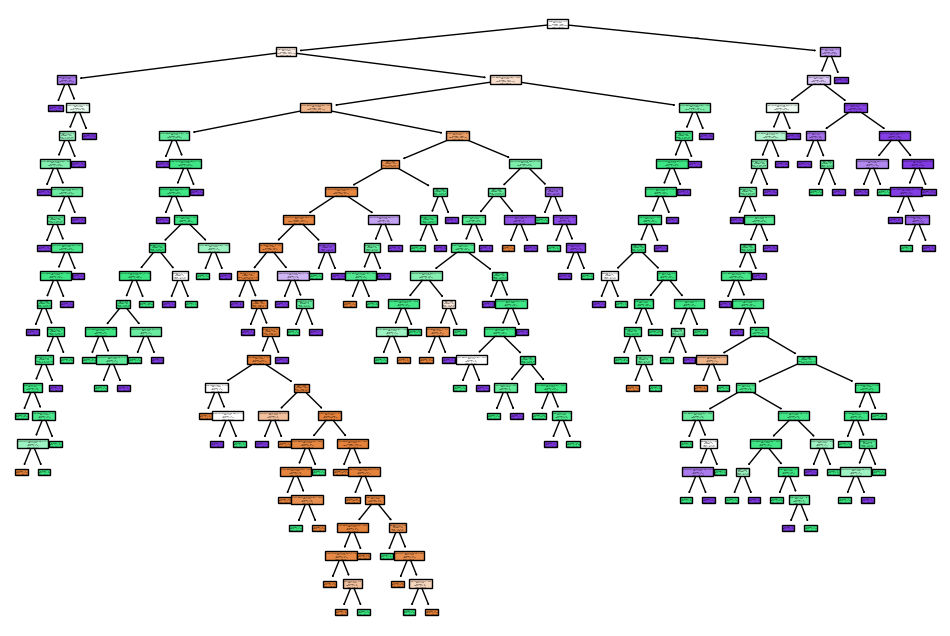

In [ ]:
# printing the decision Tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(tree_classifier, feature_names=X.columns, class_names=['low risk', 'mid risk', 'high risk'], filled=True)
plt.show()

In [ ]:
# importing test data
test_data=pd.read_excel('/content/Test3.xlsx')

#check the size of Test data
test_data.shape

(9, 9)

In [ ]:
# showing the test_data

test_data.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,25,98,86,130,80,24.9,46,6.7,2
1,35,98,70,140,90,22.1,34,4.4,2
2,29,100,80,90,70,19.0,41,5.8,2
3,30,98,70,140,85,23.7,33,4.7,2
4,35,98,76,120,60,18.8,44,6.2,0


In [ ]:
# showing the updated data
updated_data.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,29,98.6,84,129,87,19.0,42,6.4,1
1,38,102.5,51,106,91,18.8,38,4.3,2
2,21,98.6,85,142,89,22.0,30,5.6,1
3,23,98.8,70,141,80,18.8,32,5.6,1
4,22,100.1,62,144,92,24.3,46,6.7,2


In [ ]:
#  duplicate the updated data
duplicated_updated_data = updated_data.copy(deep=True)

In [ ]:
df1=test_data.copy(deep=True)

In [ ]:
df1.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,25,98,86,130,80,24.9,46,6.7,2
1,35,98,70,140,90,22.1,34,4.4,2
2,29,100,80,90,70,19.0,41,5.8,2
3,30,98,70,140,85,23.7,33,4.7,2
4,35,98,76,120,60,18.8,44,6.2,0


In [ ]:
# removing Outcome from test_data
v=test_data.drop(['Outcome'],axis=1).values
v

array([[ 25. ,  98. ,  86. , 130. ,  80. ,  24.9,  46. ,   6.7],
       [ 35. ,  98. ,  70. , 140. ,  90. ,  22.1,  34. ,   4.4],
       [ 29. , 100. ,  80. ,  90. ,  70. ,  19. ,  41. ,   5.8],
       [ 30. ,  98. ,  70. , 140. ,  85. ,  23.7,  33. ,   4.7],
       [ 35. ,  98. ,  76. , 120. ,  60. ,  18.8,  44. ,   6.2],
       [ 23. ,  98. ,  70. , 140. ,  80. ,  22. ,  36. ,   5.8],
       [ 23. ,  98. ,  78. , 130. ,  70. ,  18.8,  32. ,   6. ],
       [ 35. , 102. ,  86. ,  85. ,  60. ,  24.8,  44. ,   7.1],
       [ 32. ,  98. ,  70. , 120. ,  90. ,  24.7,  41. ,   6.3]])

In [ ]:
# predicting the result
y_pred =  tree_classifier.predict(v)
print(y_pred)

[2 1 2 0 1 0 0 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# printing the accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(test_data['Outcome'], y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4444444444444444


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd # Import pandas

# Define widgets for each feature:
age_input = widgets.IntText(description="Age:")
body_temp_input = widgets.FloatText(description="Body Temperature(F):")
heart_rate_input = widgets.IntText(description="Heart Rate (bpm):")
systolic_bp_input = widgets.IntText(description="Systolic BP (mm Hg):")
diastolic_bp_input = widgets.IntText(description="Diastolic BP (mm Hg):")
bmi_input = widgets.FloatText(description="BMI (kg/m^2):")
glucose_hba1c_input = widgets.FloatText(description="Blood Glucose (HbA1c):")
glucose_fasting_input = widgets.FloatText(description="Blood Glucose(Fasting hour-mg/dl):")

# Display the input widgets:
display(age_input, body_temp_input, heart_rate_input, systolic_bp_input,
        diastolic_bp_input,  bmi_input, glucose_hba1c_input, glucose_fasting_input)
def predict_risk(age, body_temp, heart_rate, systolic_bp, diastolic_bp, bmi, glucose_hba1c, glucose_fasting):
    # Create a DataFrame from the user input:
    # Use the correct feature name "Blood Glucose(HbA1c)"
    input_data = pd.DataFrame({
        'Age': [age],
        'Body Temperature(F) ': [body_temp],
        'Heart rate(bpm)': [heart_rate],
        'Systolic Blood Pressure(mm Hg)': [systolic_bp],
        'Diastolic Blood Pressure(mm Hg)': [diastolic_bp],
        'BMI(kg/m 2)': [bmi],
        'Blood Glucose(HbA1c)': [glucose_hba1c],  # Use the correct feature name here
        'Blood Glucose(Fasting hour-mg/dl)': [glucose_fasting]
    })

    # Make prediction:
    prediction = tree_classifier.predict(input_data)[0]

    # Return the prediction:
    risk_levels = {0: 'Low Risk', 1: 'Mid Risk', 2: 'High Risk'}
    return risk_levels[prediction]

# Create a button:
predict_button = widgets.Button(description="Predict Risk")

# Define button click event:
def on_button_clicked(b):
    prediction = predict_risk(age_input.value, body_temp_input.value, heart_rate_input.value,
                             systolic_bp_input.value, diastolic_bp_input.value, bmi_input.value,
                             glucose_hba1c_input.value, glucose_fasting_input.value)
    print(f"Predicted Risk: {prediction}")

predict_button.on_click(on_button_clicked)

# Display the button:
display(predict_button)

IntText(value=0, description='Age:')

FloatText(value=0.0, description='Body Temperature(F):')

IntText(value=0, description='Heart Rate (bpm):')

IntText(value=0, description='Systolic BP (mm Hg):')

IntText(value=0, description='Diastolic BP (mm Hg):')

FloatText(value=0.0, description='BMI (kg/m^2):')

FloatText(value=0.0, description='Blood Glucose (HbA1c):')

FloatText(value=0.0, description='Blood Glucose(Fasting hour-mg/dl):')

Button(description='Predict Risk', style=ButtonStyle())

Predicted Risk: Low Risk
Predicted Risk: High Risk
Predicted Risk: High Risk
Predicted Risk: High Risk
Predicted Risk: Low Risk
Predicted Risk: High Risk
